In [1]:
# import yfinance as yf
# data_5 = yf.download("AAPL", interval="5m", period="60d") 
# data_15 = yf.download("AAPL", interval="15m", period="60d")
# data_5.to_csv("AAPL_5min_60days.csv")
# data_15.to_csv("AAPL_15min_60days.csv")

# Visualizations

## EDA of Daily Close Price Since 2015

[*********************100%***********************]  1 of 1 completed


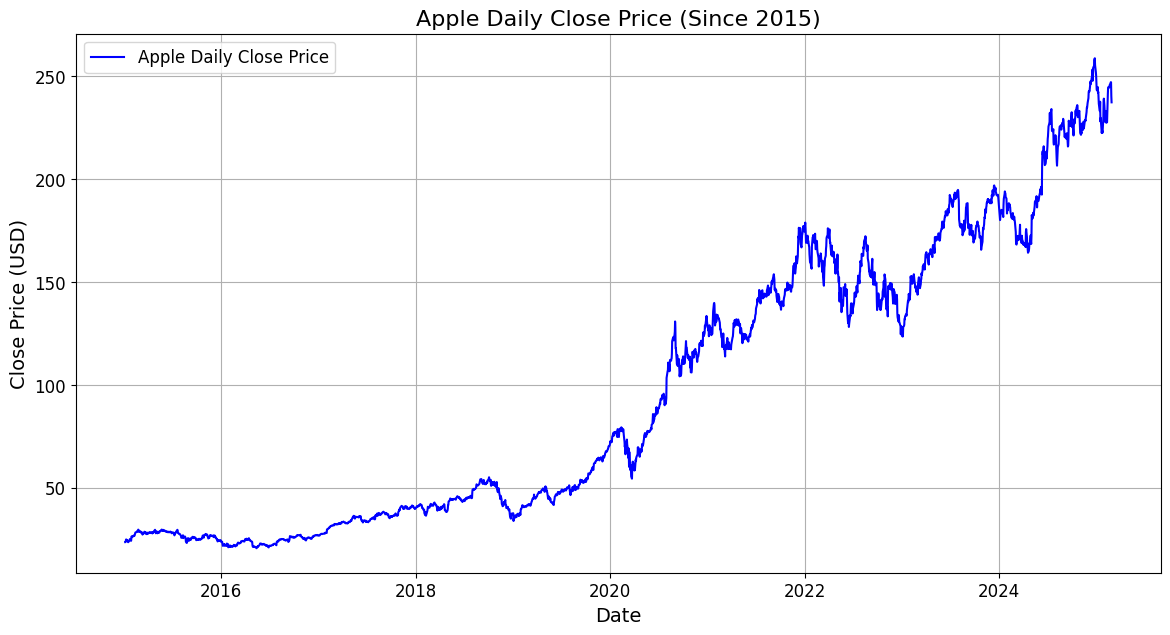

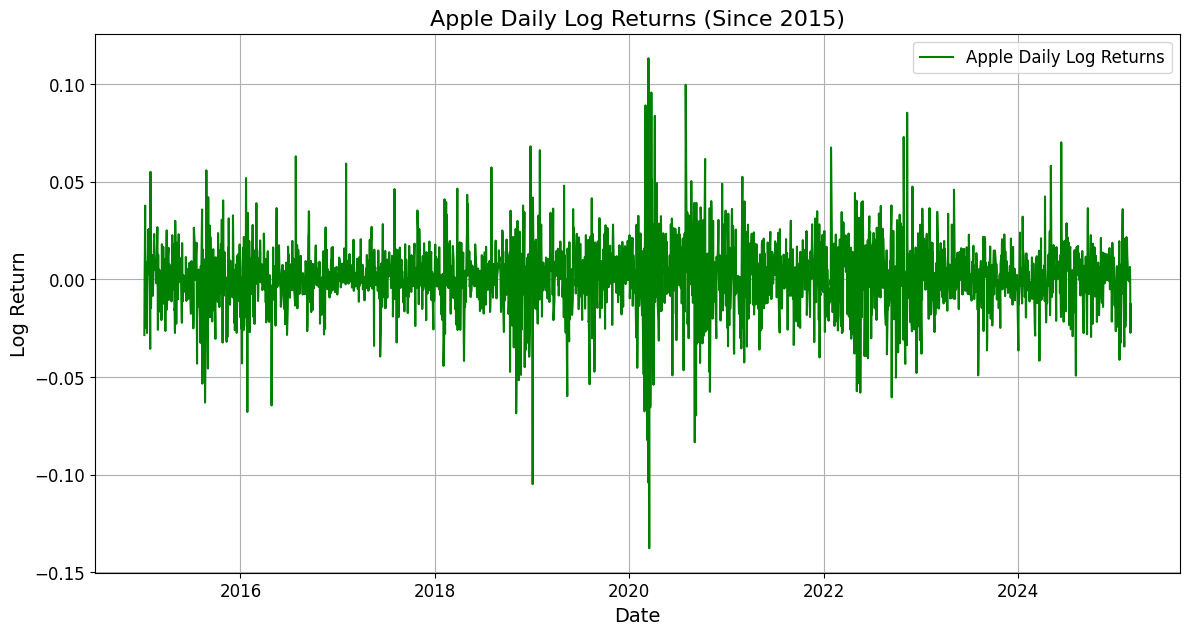

<Figure size 1200x600 with 0 Axes>

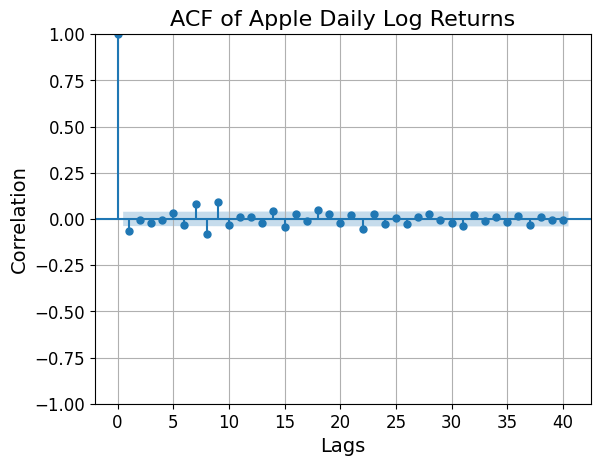

<Figure size 1200x600 with 0 Axes>

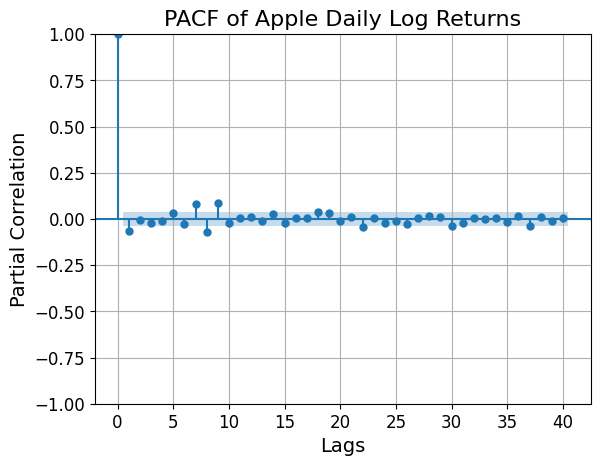

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fetch Apple's daily stock data since 2015
daily = yf.download("AAPL", start="2015-01-01", end="2025-02-28")

# Calculate log returns
daily['Log_Return'] = np.log(daily['Close'] / daily['Close'].shift(1))

# Drop the first row (NaN due to log return calculation)
daily = daily.dropna()

# Set larger font sizes for all text in the plots
plt.rcParams.update({
    'font.size': 14,          # General font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 12     # Legend font size
})

# Plot daily close price
plt.figure(figsize=(14, 7))
plt.plot(daily['Close'], label='Apple Daily Close Price', color='blue')
plt.title('Apple Daily Close Price (Since 2015)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Plot log returns
plt.figure(figsize=(14, 7))
plt.plot(daily['Log_Return'], label='Apple Daily Log Returns', color='green')
plt.title('Apple Daily Log Returns (Since 2015)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()

# Plot ACF of log returns
plt.figure(figsize=(12, 6))
plot_acf(daily['Log_Return'], lags=40, alpha=0.05, title='ACF of Apple Daily Log Returns')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid()
plt.show()

# Plot PACF of log returns
plt.figure(figsize=(12, 6))
plot_pacf(daily['Log_Return'], lags=40, alpha=0.05, title='PACF of Apple Daily Log Returns')
plt.xlabel('Lags')
plt.ylabel('Partial Correlation')
plt.grid()
plt.show()

## EDA of Daily Volume Since 2015

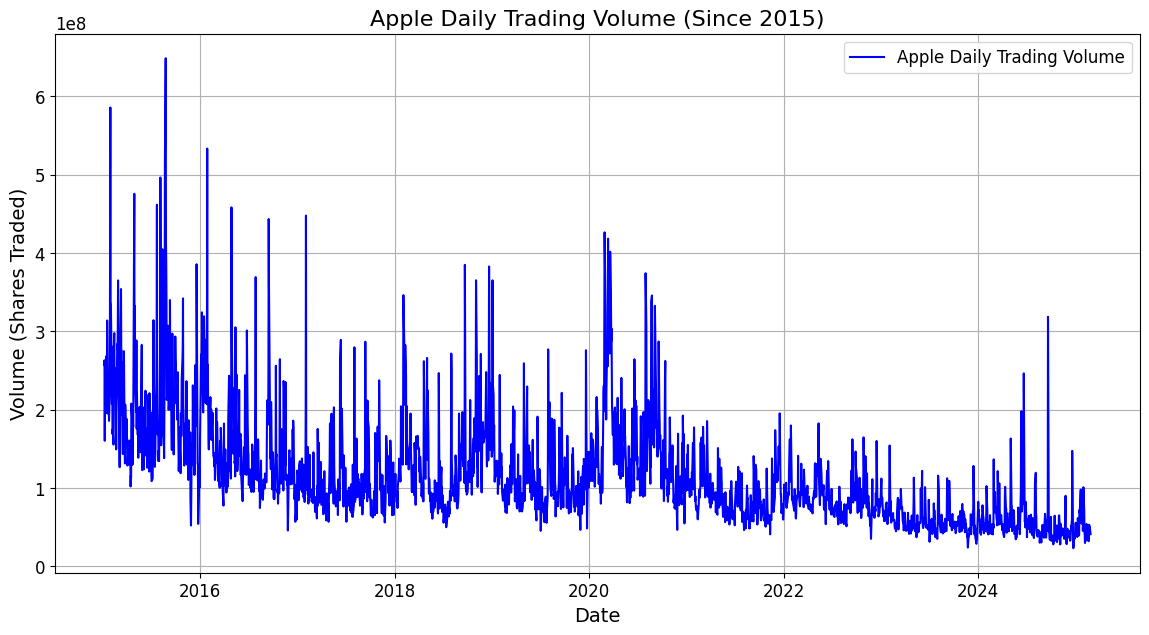

<Figure size 1200x600 with 0 Axes>

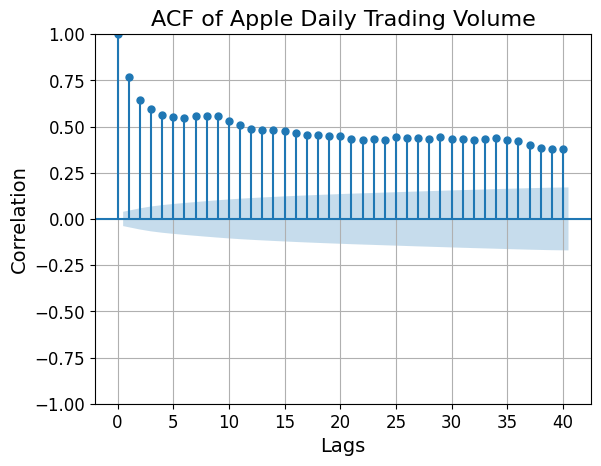

<Figure size 1200x600 with 0 Axes>

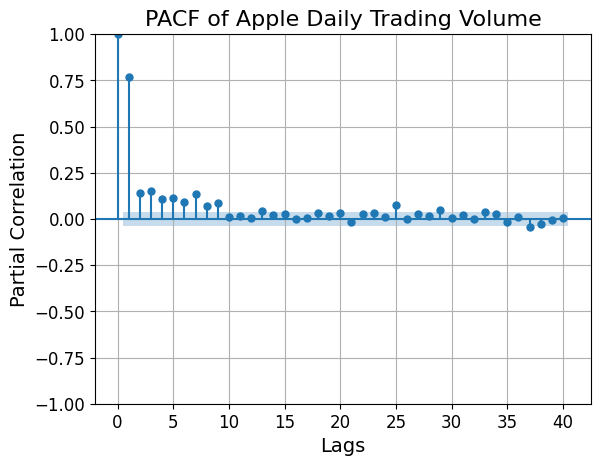

In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set larger font sizes for all text in the plots
plt.rcParams.update({
    'font.size': 14,          # General font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 12     # Legend font size
})

# Plot daily volume
plt.figure(figsize=(14, 7))
plt.plot(daily['Volume'], label='Apple Daily Trading Volume', color='blue')
plt.title('Apple Daily Trading Volume (Since 2015)')
plt.xlabel('Date')
plt.ylabel('Volume (Shares Traded)')
plt.legend()
plt.grid()
plt.show()

# Plot ACF of volume
plt.figure(figsize=(12, 6))
plot_acf(daily['Volume'], lags=40, alpha=0.05, title='ACF of Apple Daily Trading Volume')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid()
plt.show()

# Plot PACF of log returns
plt.figure(figsize=(12, 6))
plot_pacf(daily['Volume'], lags=40, alpha=0.05, title='PACF of Apple Daily Trading Volume')
plt.xlabel('Lags')
plt.ylabel('Partial Correlation')
plt.grid()
plt.show()

## EDA of 5-Minute Price for 60 Days

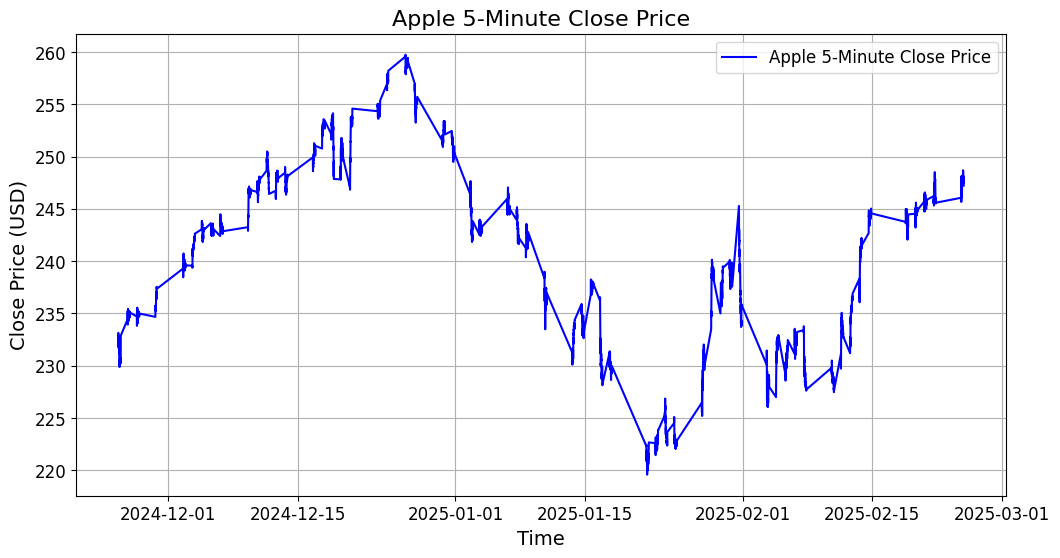

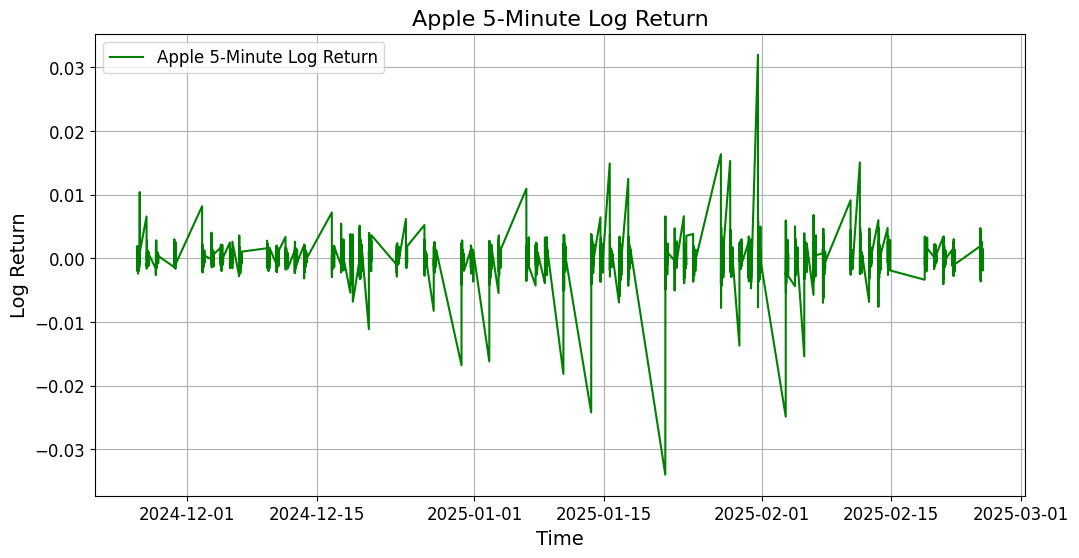

<Figure size 1200x600 with 0 Axes>

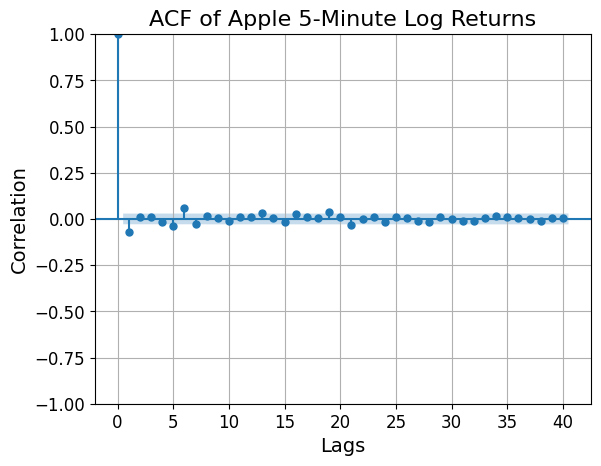

<Figure size 1200x600 with 0 Axes>

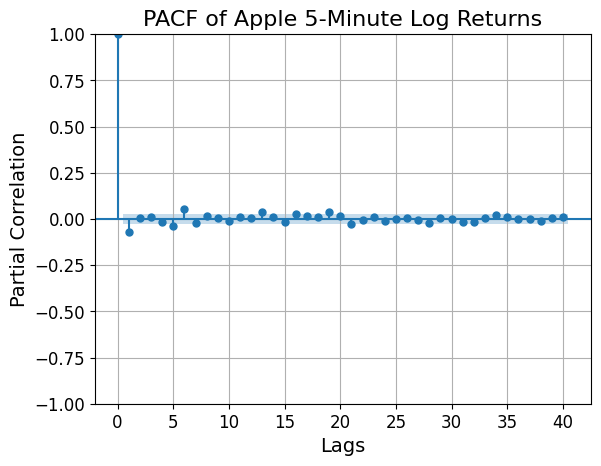

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf


five = pd.read_csv("AAPL_5min_60days.csv")
five['Datetime'] = pd.to_datetime(five['Datetime'])
five.set_index('Datetime', inplace=True)

five['Log_Return'] = np.log(five['Close'] / five['Close'].shift(1))

# Set larger font sizes for all text in the plots
plt.rcParams.update({
    'font.size': 14,          # General font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 12     # Legend font size
})

# Time plot of Apple's daily close price
plt.figure(figsize=(12, 6))
plt.plot(five['Close'], label='Apple 5-Minute Close Price', color='blue')
plt.title('Apple 5-Minute Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Time plot of Apple's 5-minute log returns
plt.figure(figsize=(12, 6))
plt.plot(five['Log_Return'], label='Apple 5-Minute Log Return', color='green')
plt.title('Apple 5-Minute Log Return')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()


from statsmodels.graphics.tsaplots import plot_acf
five = five.dropna()

# Plot ACF of log returns
plt.figure(figsize=(12, 6))
plot_acf(five['Log_Return'], lags=40, alpha=0.05, title='ACF of Apple 5-Minute Log Returns')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid()
plt.show()
# PACF
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF of log returns
plt.figure(figsize=(12, 6))
plot_pacf(five['Log_Return'], lags=40, alpha=0.05, title='PACF of Apple 5-Minute Log Returns')
plt.xlabel('Lags')
plt.ylabel('Partial Correlation')
plt.grid()
plt.show()

## EDA of 5-Minute Volume for 60 Days

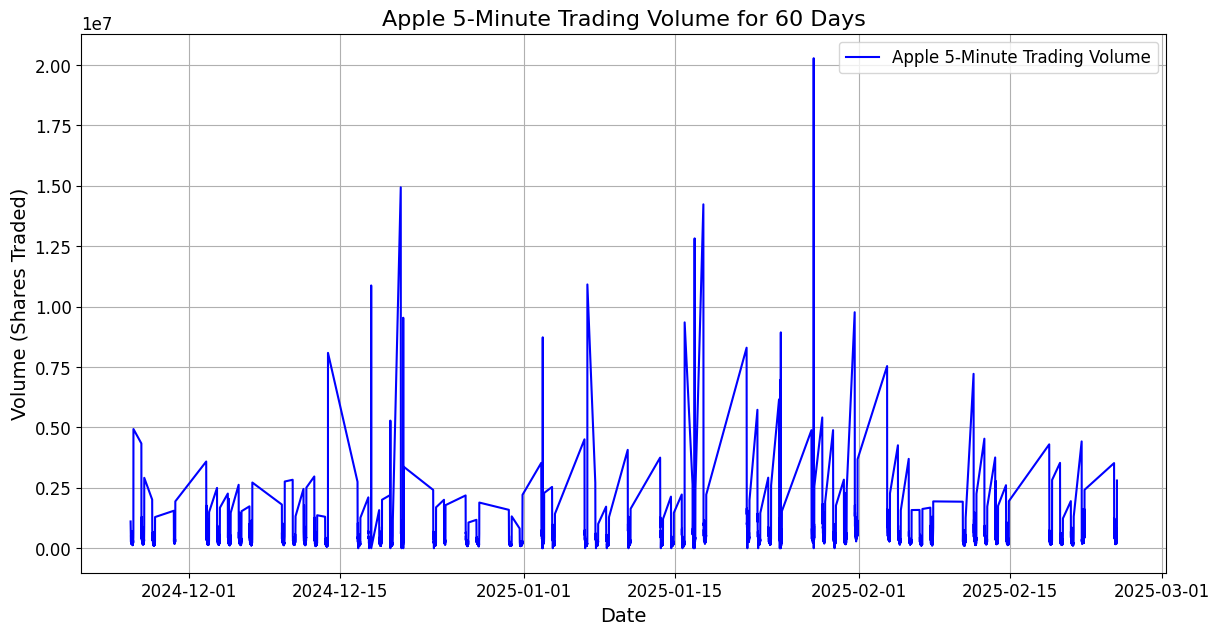

<Figure size 1200x600 with 0 Axes>

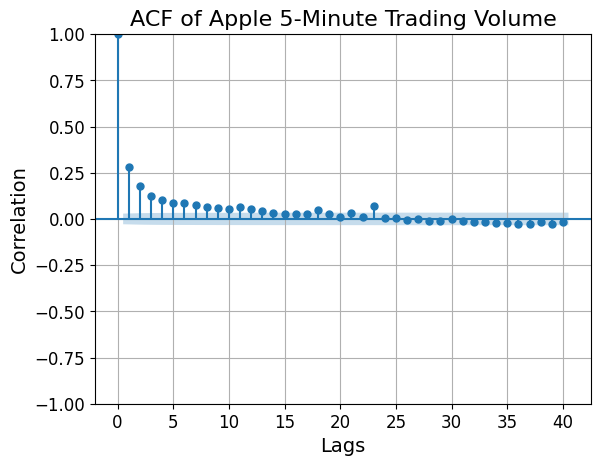

<Figure size 1200x600 with 0 Axes>

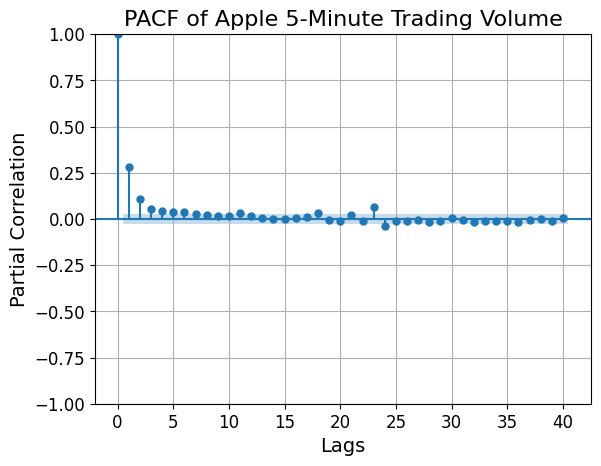

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set larger font sizes for all text in the plots
plt.rcParams.update({
    'font.size': 14,          # General font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 12     # Legend font size
})

# Plot daily volume
plt.figure(figsize=(14, 7))
plt.plot(five['Volume'], label='Apple 5-Minute Trading Volume', color='blue')
plt.title('Apple 5-Minute Trading Volume for 60 Days')
plt.xlabel('Date')
plt.ylabel('Volume (Shares Traded)')
plt.legend()
plt.grid()
plt.show()

# Plot ACF of volume
plt.figure(figsize=(12, 6))
plot_acf(five['Volume'], lags=40, alpha=0.05, title='ACF of Apple 5-Minute Trading Volume')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid()
plt.show()

# Plot PACF of log returns
plt.figure(figsize=(12, 6))
plot_pacf(five['Volume'], lags=40, alpha=0.05, title='PACF of Apple 5-Minute Trading Volume')
plt.xlabel('Lags')
plt.ylabel('Partial Correlation')
plt.grid()
plt.show()

# Modeling on Daily Close and Volume

## ETS Model - Daily Close

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


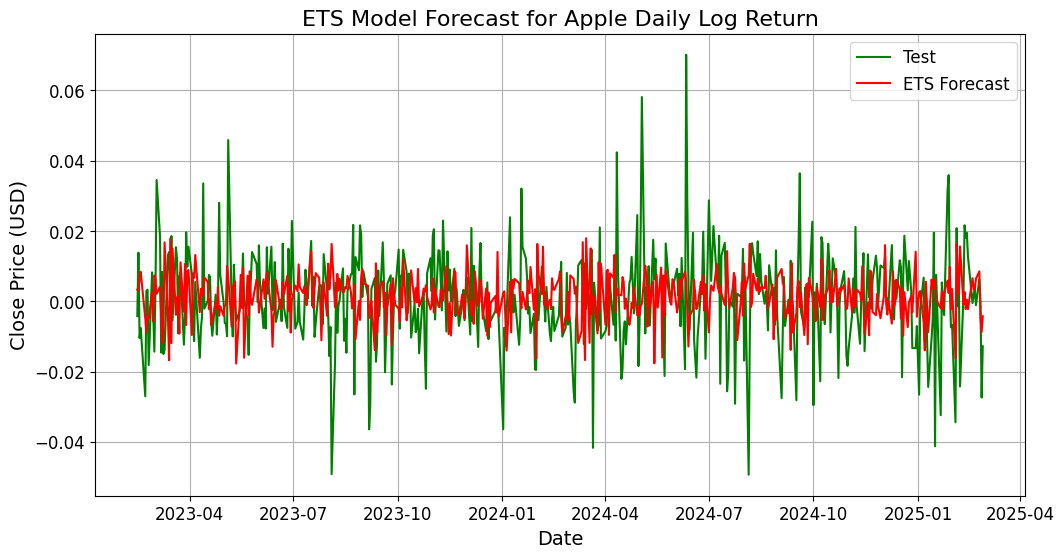

ETS RMSE: 0.015213357955801587


In [40]:
# Split data into train and test sets
train_size = int(len(daily['Log_Return']) * 0.8)
train_daily, test_daily = daily['Log_Return'][:train_size], daily['Log_Return'][train_size:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
ets_model = ExponentialSmoothing(
    train_daily,
    trend="add",  # Additive trend
    seasonal="add",  # Additive seasonality (if applicable)
    seasonal_periods=252,  # Assuming yearly seasonality (252 trading days)
).fit()

# Forecast on test data
ets_forecast = ets_model.forecast(len(test_daily))

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_daily.index, train_daily, label='Train', color='blue')
plt.plot(test_daily.index, test_daily, label='Test', color='green')
plt.plot(test_daily.index, ets_forecast, label='ETS Forecast', color='red')
plt.title('ETS Model Forecast for Apple Daily Log Return')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ETS
from sklearn.metrics import mean_squared_error
from math import sqrt

daily_ets_rmse = sqrt(mean_squared_error(test_daily, ets_forecast))
print(f"ETS RMSE: {daily_ets_rmse}")


## ARIMA - Daily Close

In [34]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
adf_result = adfuller(train_daily)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
 

ADF Statistic: -13.883290199935388
p-value: 6.154844684348314e-26


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10417.463, Time=0.07 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10428.326, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10428.473, Time=0.10 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10426.503, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-10426.472, Time=0.17 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-10436.261, Time=0.74 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-10423.264, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-10425.089, Time=0.08 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10424.459, Time=0.30 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-10421.275, Time=0.59 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-10428.077, Time=0.55 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 4.062 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2042
Model:               SARIMAX(1, 0, 2)   Log Likelihood                5222.130
Date:                Fri, 07 Mar 2025   AIC                         -10436.261
Time:                        16:48:18   BIC                         -10413.774
Sample:                             0   HQIC                        -10428.013
                               - 2042                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8804      0.045    -19.370      0.000      -0.97

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


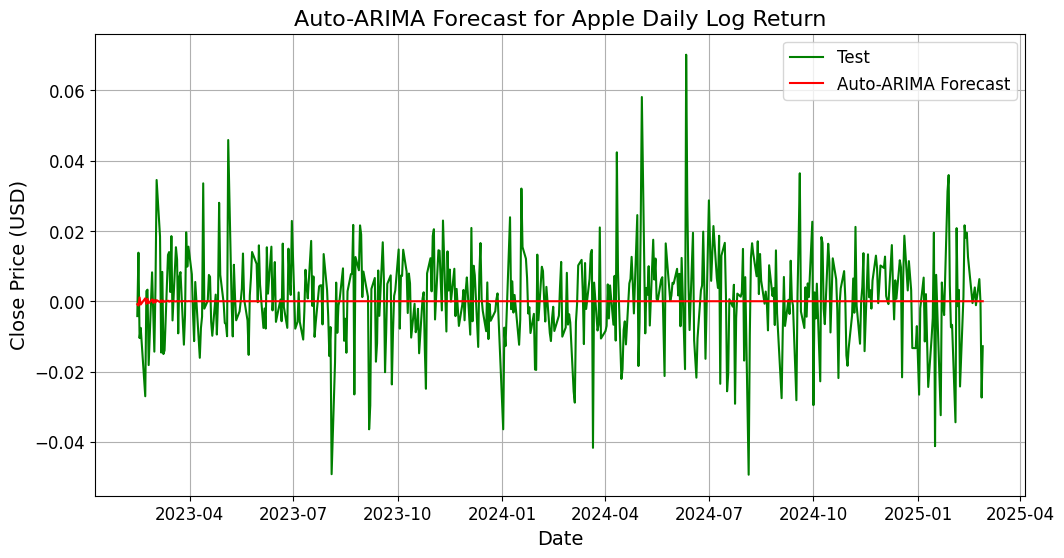

ETS RMSE: 0.013656678492965944


In [42]:
from pmdarima import auto_arima
import numpy as np

# Auto-ARIMA to find the best parameters
auto_model = auto_arima(train_daily, seasonal=False, trace=True)
print(auto_model.summary())

# Forecast using the best model
auto_forecast = auto_model.predict(n_periods=len(test_daily))

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_daily.index, train_daily, label='Train', color='blue')
plt.plot(test_daily.index, test_daily, label='Test', color='green')
plt.plot(test_daily.index, auto_forecast, label='Auto-ARIMA Forecast', color='red')
plt.title('Auto-ARIMA Forecast for Apple Daily Log Return')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

daily_arimas_rmse = sqrt(mean_squared_error(test_daily, auto_forecast))
print(f"ARIMA RMSE: {daily_arimas_rmse}")

In [ ]:
# Best model:  ARIMA(1,0,2)(0,0,0)[0]
# Total fit time: 3.873 seconds
# SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 2042
# Model:               SARIMAX(1, 0, 2)   Log Likelihood                5222.130
# Date:                Fri, 07 Mar 2025   AIC                         -10436.261
# Time:                        16:28:14   BIC                         -10413.774
# Sample:                             0   HQIC                        -10428.013
# - 2042
# Covariance Type:                  opg
# ==============================================================================
# coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.8804      0.045    -19.370      0.000      -0.970      -0.791
# ma.L1          0.8091      0.048     16.750      0.000       0.714       0.904
# ma.L2         -0.1012      0.015     -6.944      0.000      -0.130      -0.073
# sigma2         0.0004   6.74e-06     52.140      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1712.83
# Prob(Q):                              0.81   Prob(JB):                         0.00
# Heteroskedasticity (H):               1.94   Skew:                            -0.30
# Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).

## ETS Model - Daily Volume

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


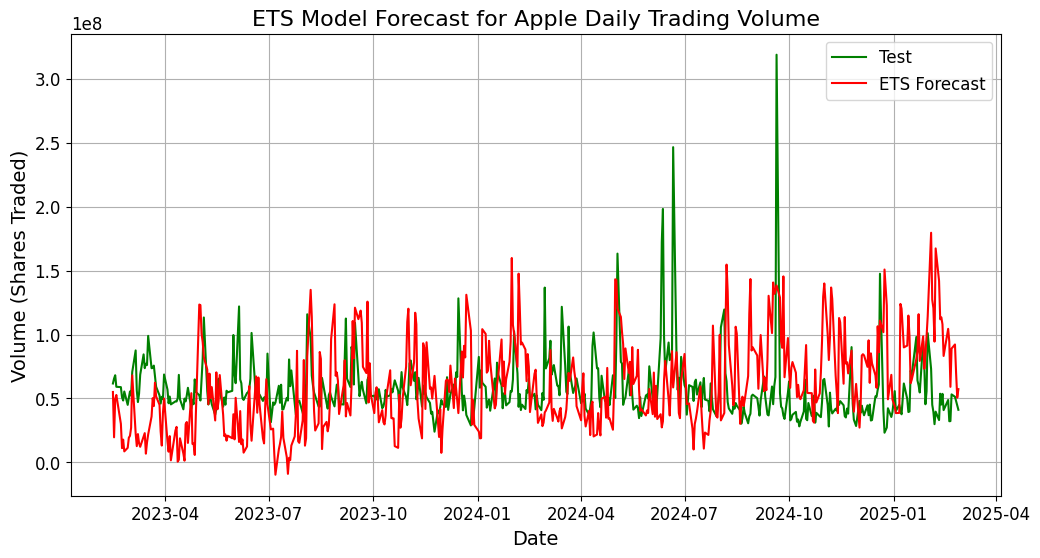

ETS RMSE: 42760809.14811065


In [57]:
# Split data into train and test sets
train_size = int(len(daily['Volume']) * 0.8)
train_daily_v, test_daily_v = daily['Volume'][:train_size], daily['Volume'][train_size:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
ets_model = ExponentialSmoothing(
    train_daily_v,
    trend="add",  # Additive trend
    seasonal="add",  # Additive seasonality (if applicable)
    seasonal_periods=252,  # Assuming yearly seasonality (252 trading days)
).fit()

# Forecast on test data
ets_forecast_v = ets_model.forecast(len(test_daily_v))

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_daily.index, train_daily, label='Train', color='blue')
plt.plot(test_daily_v.index, test_daily_v, label='Test', color='green')
plt.plot(test_daily_v.index, ets_forecast_v, label='ETS Forecast', color='red')
plt.title('ETS Model Forecast for Apple Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (Shares Traded)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ETS
from sklearn.metrics import mean_squared_error
from math import sqrt

daily_v_ets_rmse = sqrt(mean_squared_error(test_daily_v, ets_forecast_v))
print(f"ETS RMSE: {daily_v_ets_rmse}")


## ARIMA - Daily Volume

In [55]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
adf_result = adfuller(train_daily_v)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
 

ADF Statistic: -6.316364078460749
p-value: 3.143390738510087e-08


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=77735.132, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78187.540, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78073.997, Time=0.13 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=77965.435, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78185.548, Time=0.03 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=77742.582, Time=0.30 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=77747.084, Time=0.28 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=77737.086, Time=0.75 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=77737.607, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=77746.158, Time=0.20 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=77745.350, Time=0.39 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=77748.618, Time=0.43 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=77737.234, Time=1.48 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=77732.130, Time=0.49 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=77737.186, Time=0.26 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=77743.234, Time=0.22 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=77733.999, Time=0.67 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=77733.240, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=77741.862, Time=0.17 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=77734.254, Time=0.65 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=77744.192, Time=0.41 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=77735.114, Time=0.66 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 10.196 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2042
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -38861.065
Date:                Fri, 07 Mar 2025   AIC                          77732.130
Time:                        18:21:16   BIC                          77760.236
Sample:                             0   HQIC                         77742.440
                               - 2042                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4029      0.071     -5.650      0.000      -0.54

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


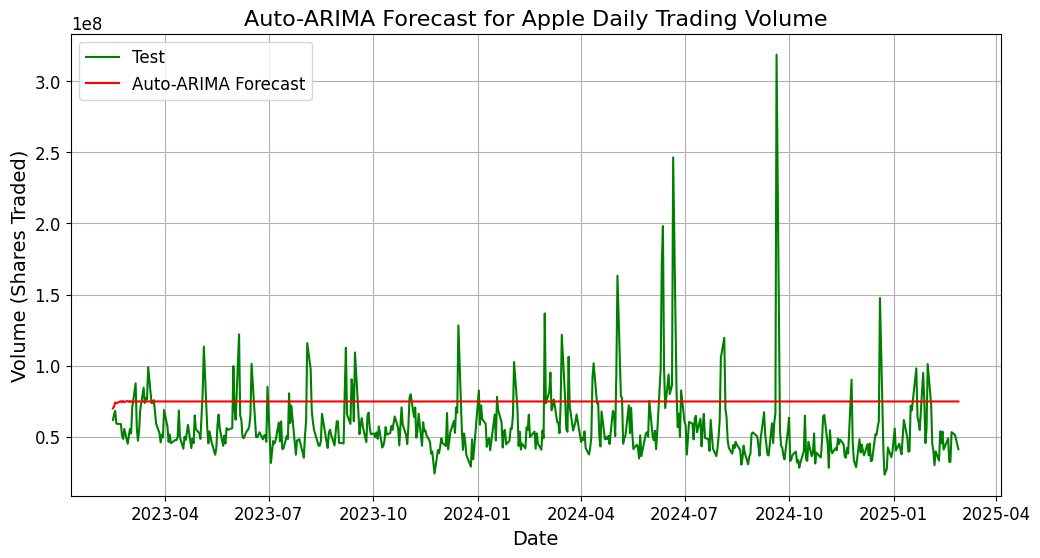

ARIMA RMSE: 30426647.891305033


In [58]:
from pmdarima import auto_arima
import numpy as np

# Auto-ARIMA to find the best parameters
auto_model = auto_arima(train_daily_v, seasonal=False, trace=True)
print(auto_model.summary())

# Forecast using the best model
auto_forecast_v = auto_model.predict(n_periods=len(test_daily_v))

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_daily.index, train_daily, label='Train', color='blue')
plt.plot(test_daily_v.index, test_daily_v, label='Test', color='green')
plt.plot(test_daily_v.index, auto_forecast_v, label='Auto-ARIMA Forecast', color='red')
plt.title('Auto-ARIMA Forecast for Apple Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (Shares Traded)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

daily_v_arimas_rmse = sqrt(mean_squared_error(test_daily_v, auto_forecast_v))
print(f"ARIMA RMSE: {daily_v_arimas_rmse}")

# Modeling on 5-Minute Close and Volume

## ETS Model - 5 Minute Close

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


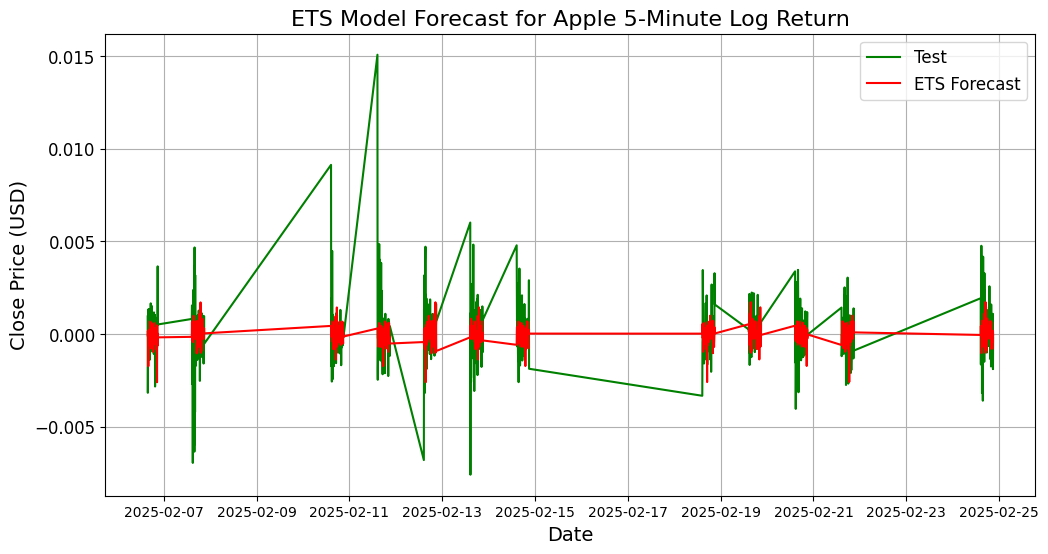

ETS RMSE: 0.001464709912453421


In [66]:
# Split data into train and test sets
train_size = int(len(five['Log_Return']) * 0.8)
train_five, test_five = five['Log_Return'][:train_size], five['Log_Return'][train_size:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
ets_model = ExponentialSmoothing(
    train_five,
    trend="add",  # Additive trend
    seasonal="add",  # Additive seasonality (if applicable)
    seasonal_periods=252,  # Assuming yearly seasonality (252 trading days)
).fit()

# Forecast on test data
ets_forecast = ets_model.forecast(len(test_five))

plt.rcParams.update({
    'font.size': 14,          # General font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 10,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 12     # Legend font size
})

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_five.index, train_five, label='Train', color='blue')
plt.plot(test_five.index, test_five, label='Test', color='green')
plt.plot(test_five.index, ets_forecast, label='ETS Forecast', color='red')
plt.title('ETS Model Forecast for Apple 5-Minute Log Return')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ETS
from sklearn.metrics import mean_squared_error
from math import sqrt

five_ets_rmse = sqrt(mean_squared_error(test_five, ets_forecast))
print(f"ETS RMSE: {five_ets_rmse}")

## ARIMA - 5 Minute Close

In [30]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
adf_result = adfuller(train_five)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
 

ADF Statistic: -24.670312919648186
p-value: 0.0


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-36008.982, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-35998.396, Time=0.14 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-36014.532, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-36014.568, Time=0.14 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-36012.587, Time=0.17 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-36012.599, Time=0.37 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-36010.666, Time=0.43 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-36012.568, Time=0.38 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.220 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3685
Model:               SARIMAX(0, 0, 1)   Log Likelihood               18009.284
Date:                Fri, 07 Mar 2025   AIC                         -36014.568
Time:                        16:59:59   BIC                         -36002.143
Sample:                             0   HQIC                        -36010.145
                               - 3685                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0703      0.011     -6.511      0.000      -0.09

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


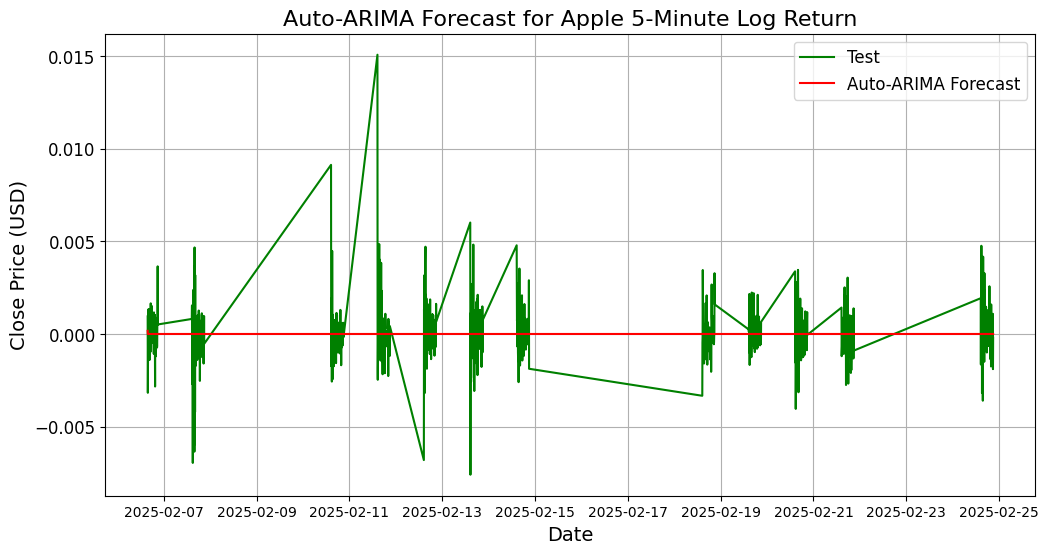

ETS RMSE: 0.0014164240635833238


In [49]:
from pmdarima import auto_arima
import numpy as np

# Auto-ARIMA to find the best parameters
auto_model = auto_arima(train_five, seasonal=False, trace=True)
print(auto_model.summary())

# Forecast using the best model
auto_forecast = auto_model.predict(n_periods=len(test_five))

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_five.index, train_five, label='Train', color='blue')
plt.plot(test_five.index, test_five, label='Test', color='green')
plt.plot(test_five.index, auto_forecast, label='Auto-ARIMA Forecast', color='red')
plt.title('Auto-ARIMA Forecast for Apple 5-Minute Log Return')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

five_arima_rmse = sqrt(mean_squared_error(test_five, auto_forecast))
print(f"ARIMA RMSE: {five_arima_rmse}")

In [32]:
# ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-36012.568, Time=0.37 sec
# 
# Best model:  ARIMA(0,0,1)(0,0,0)[0]
# Total fit time: 2.167 seconds
# SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 3685
# Model:               SARIMAX(0, 0, 1)   Log Likelihood               18009.284
# Date:                Fri, 07 Mar 2025   AIC                         -36014.568
# Time:                        16:19:21   BIC                         -36002.143
# Sample:                             0   HQIC                        -36010.145
# - 3685
# Covariance Type:                  opg
# ==============================================================================
# coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0703      0.011     -6.511      0.000      -0.091      -0.049
# sigma2      3.331e-06   1.22e-08    273.344      0.000    3.31e-06    3.35e-06
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1192707.44
# Prob(Q):                              1.00   Prob(JB):                         0.00
# Heteroskedasticity (H):               5.27   Skew:                            -1.92
# Prob(H) (two-sided):                  0.00   Kurtosis:                        91.05
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).

## ETS Model - 5-Minute Volume

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


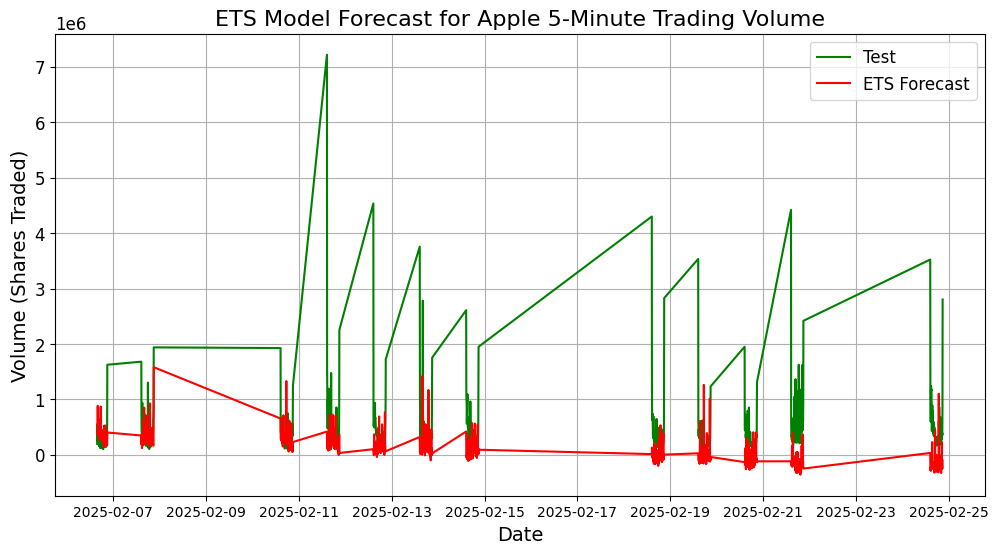

ETS RMSE: 643349.7830434411


In [67]:
# Split data into train and test sets
train_size = int(len(five['Volume']) * 0.8)
train_five_v, test_five_v = five['Volume'][:train_size], five['Volume'][train_size:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
ets_model = ExponentialSmoothing(
    train_five_v,
    trend="add",  # Additive trend
    seasonal="add",  # Additive seasonality (if applicable)
    seasonal_periods=252,  # Assuming yearly seasonality (252 trading days)
).fit()

# Forecast on test data
ets_forecast_v = ets_model.forecast(len(test_five_v))

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_daily.index, train_daily, label='Train', color='blue')
plt.plot(test_five_v.index, test_five_v, label='Test', color='green')
plt.plot(test_five_v.index, ets_forecast_v, label='ETS Forecast', color='red')
plt.title('ETS Model Forecast for Apple 5-Minute Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (Shares Traded)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ETS
from sklearn.metrics import mean_squared_error
from math import sqrt

five_v_ets_rmse = sqrt(mean_squared_error(test_five_v, ets_forecast_v))
print(f"ETS RMSE: {five_v_ets_rmse}")


## ARIMA - 5-Minute Volume

In [68]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
adf_result = adfuller(train_five_v)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
 

ADF Statistic: -10.021547366482462
p-value: 1.6738877382568724e-17


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=110611.222, Time=2.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=112345.665, Time=0.14 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=111572.390, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=110779.484, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=112343.665, Time=0.04 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=110641.642, Time=0.75 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.93 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=110665.256, Time=0.42 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.81 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.80 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=1.79 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 15.267 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3685
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -55299.611
Date:                Fri, 07 Mar 2025   AIC                         110611.222
Time:                        18:56:14   BIC                         110648.492
Sample:                             0   HQIC                        110624.489
                               - 3685                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -180.9691    150.983     -1.199      0.231    -476.890     

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


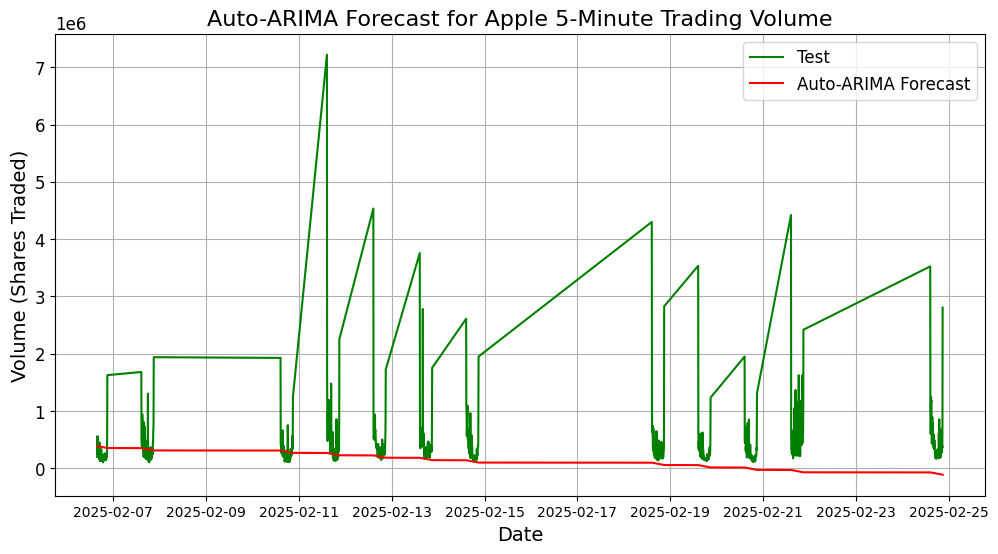

ARIMA RMSE: 588372.1945448179


In [70]:
from pmdarima import auto_arima
import numpy as np

# Auto-ARIMA to find the best parameters
auto_model = auto_arima(train_five_v, seasonal=False, trace=True)
print(auto_model.summary())

# Forecast using the best model
auto_forecast_v = auto_model.predict(n_periods=len(test_five_v))

# Plot results
plt.figure(figsize=(12, 6))
# plt.plot(train_daily.index, train_daily, label='Train', color='blue')
plt.plot(test_five_v.index, test_five_v, label='Test', color='green')
plt.plot(test_five_v.index, auto_forecast_v, label='Auto-ARIMA Forecast', color='red')
plt.title('Auto-ARIMA Forecast for Apple 5-Minute Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (Shares Traded)')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE for ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

five_v_arimas_rmse = sqrt(mean_squared_error(test_five_v, auto_forecast_v))
print(f"ARIMA RMSE: {five_v_arimas_rmse}")

# Analyze Intraday Patterns

1. Opening Gaps on 15-Minute Data
2. Midday Reversals on 15-Minute Data

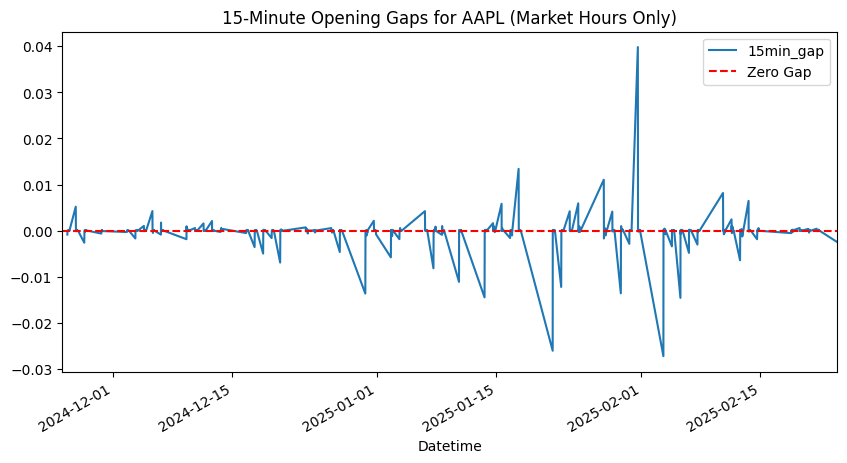

In [2]:
# Opening Gaps on 15-Minute Data
data['15min_gap'] = (data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1)

# Plot the 15-minute gaps
data['15min_gap'].plot(figsize=(10, 5), title='15-Minute Opening Gaps for AAPL (Market Hours Only)')
plt.xlim(pd.to_datetime('2024-11-25'), pd.to_datetime('2025-02-24'))
plt.axhline(0, color='red', linestyle='--', label='Zero Gap')
plt.legend()
plt.show()

In [3]:
# Function to detect mid-15-minute reversals
def detect_mid_15min_reversal(row, threshold=0.01):
    """
    Detects a mid-15-minute reversal based on Open, High, Low, and Close prices.
    :param row: A row of the DataFrame containing Open, High, Low, and Close prices.
    :param threshold: Minimum price change (in percentage) to qualify as a reversal.
    :return: True if a reversal is detected, False otherwise.
    """
    # Calculate price changes
    high_to_low = (row['High'] - row['Low']) / row['Open'] # Percentage change from high to low
    open_to_high = (row['High'] - row['Open']) / row['Open']   # Percentage change from open to high
    open_to_low = (row['Low'] - row['Open']) / row['Open']   # Percentage change from open to low

    # Check for reversal
    if abs(high_to_low) >= threshold:  # Ensure the price movement is significant
        if open_to_high > 0 > open_to_low:  # Price rose and then fell
            return True
        elif open_to_high < 0 < open_to_low:  # Price fell and then rose
            return True
    return False

# Apply the function to each row
data['Mid_15min_Reversal'] = data.apply(detect_mid_15min_reversal, axis=1)

# Count the number of reversals
reversal_count = data['Mid_15min_Reversal'].sum()
print(f"Total mid-15-minute reversals detected: {reversal_count}")
print(data.loc[data['Mid_15min_Reversal'] == True])

Total mid-15-minute reversals detected: 23
                                Close        High         Low        Open  \
Datetime                                                                    
2024-11-25 20:45:00+00:00  232.880005  233.169998  229.845001  230.354996   
2024-12-02 14:30:00+00:00  238.460007  239.600006  237.160004  237.270004   
2024-12-17 14:30:00+00:00  252.779999  252.860397  249.789993  250.134995   
2024-12-27 14:30:00+00:00  256.440002  258.700012  256.109985  257.899994   
2025-01-02 14:30:00+00:00  245.195999  249.100006  244.800003  248.929993   
2025-01-13 14:30:00+00:00  231.169998  233.589996  230.199997  233.500000   
2025-01-15 14:30:00+00:00  237.350006  237.520004  234.429993  234.639999   
2025-01-17 14:30:00+00:00  229.889008  232.289993  229.720001  231.309998   
2025-01-21 14:30:00+00:00  220.899994  224.419998  220.800003  224.000000   
2025-01-22 14:30:00+00:00  221.447998  223.089996  219.800003  219.940002   
2025-01-27 14:30:00+00:00  226.72